In [1]:
pip install pymongo

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
df = pd.read_csv('New Institutes - New Institutes.csv')
df.head()

,S.No.,Application Number,Application Type,Institute Name,Inst Address,Inst Address 2,CITY,District,Pincode,Minority Institute,Womens institute,State,Region,Inst Type,Program,Course,Level,Specialization,Intake,Approval
0,1.0,1-4645821,New Institute,ABHILASHI GROUP OF INSTITUTIONS (SCHOOL OF PHA...,"CHAIL CHOWK (CHACHYOT), DISTT. MANDI H.P.",CHAILCHOWK,CHAIL CHOWK (CHACHYOT),MANDI,175045,NaN,NaN,Himachal Pradesh,North-West,Unaided-Private,Pharmacy,Pharmacy,Graduate,B. PHARMACY,60,Yes
1,NaN,1-4645821,New Institute,ABHILASHI GROUP OF INSTITUTIONS (SCHOOL OF PHA...,"CHAIL CHOWK (CHACHYOT), DISTT. MANDI H.P.",CHAILCHOWK,CHAIL CHOWK (CHACHYOT),MANDI,175045,NaN,NaN,Himachal Pradesh,North-West,Unaided-Private,Engineering & Technology,Electrical & Communication,Graduate,ELECTRICAL & COMMUNICATION,60,Yes
2,NaN,1-4645821,New Institute,ABHILASHI GROUP OF INSTITUTIONS (SCHOOL OF PHA...,"CHAIL CHOWK (CHACHYOT), DISTT. MANDI H.P.",CHAILCHOWK,CHAIL CHOWK (CHACHYOT),MANDI,175045,NaN,NaN,Himachal Pradesh,North-West,Unaided-Private,Engineering & Technology,Electrical / Electrical & Elex,Graduate,ELECTRICAL & ELECTRONICS,60,Yes
3,NaN,1-4645821,New Institute,ABHILASHI GROUP OF INSTITUTIONS (SCHOOL OF PHA...,"CHAIL CHOWK (CHACHYOT), DISTT. MANDI H.P.",CHAILCHOWK,CHAIL CHOWK (CHACHYOT),MANDI,175045,NaN,NaN,Himachal Pradesh,North-West,Unaided-Private,Engineering & Technology,Mechanical Engineering,Graduate,MECHANICAL,60,Yes
4,NaN,1-4645821,New Institute,ABHILASHI GROUP OF INSTITUTIONS (SCHOOL OF PHA...,"CHAIL CHOWK (CHACHYOT), DISTT. MANDI H.P.",CHAILCHOWK,CHAIL CHOWK (CHACHYOT),MANDI,175045,NaN,NaN,Himachal Pradesh,North-West,Unaided-Private,Engineering & Technology,Civil Engineering,Graduate,CIVIL,120,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015 entries, 0 to 1014
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   S.No.               305 non-null    float64
 1   Application Number  1015 non-null   object 
 2   Application Type    1015 non-null   object 
 3   Institute Name      1015 non-null   object 
 4   Inst Address        1015 non-null   object 
 5   Inst Address 2      608 non-null    object 
 6   CITY                986 non-null    object 
 7   District            1012 non-null   object 
 8   Pincode             957 non-null    object 
 9   Minority Institute  111 non-null    object 
 10  Womens institute    41 non-null     object 
 11  State               1015 non-null   object 
 12  Region              1015 non-null   object 
 13  Inst Type           1015 non-null   object 
 14  Program             1015 non-null   object 
 15  Course              1014 non-null   object 
 16  Level 

In [5]:
print(df)

      S.No. Application Number Application Type  \
0       1.0          1-4645821    New Institute   
1       NaN          1-4645821    New Institute   
2       NaN          1-4645821    New Institute   
3       NaN          1-4645821    New Institute   
4       NaN          1-4645821    New Institute   
...     ...                ...              ...   
1010    NaN         1-12393881    New Institute   
1011    NaN         1-12393881    New Institute   
1012    NaN         1-12393881    New Institute   
1013    NaN         1-12393881    New Institute   
1014    NaN         1-12393881    New Institute   

                                         Institute Name  \
0     ABHILASHI GROUP OF INSTITUTIONS (SCHOOL OF PHA...   
1     ABHILASHI GROUP OF INSTITUTIONS (SCHOOL OF PHA...   
2     ABHILASHI GROUP OF INSTITUTIONS (SCHOOL OF PHA...   
3     ABHILASHI GROUP OF INSTITUTIONS (SCHOOL OF PHA...   
4     ABHILASHI GROUP OF INSTITUTIONS (SCHOOL OF PHA...   
...                              

In [26]:
Schema={

        "Application_id":"Application Number",
        "Application_Name":"Application Type"
        "Pincode":"Pincode",
        "Institute_Name":"Institute Name",
        "Int_Address":"Inst Address",
        "Inst_Address_2":"Inst Address 2",
        "City":"CITY",
        "District":"District",
        "Minority_Institute":"Minority Institute",
        "Womens_institute":"Womens institute",
        "State"
        
}

SyntaxError: invalid syntax (2966277886.py, line 5)

In [22]:
missing_values = df.isnull().sum()
print(missing_values)

S.No.                 710
Application Number      0
Application Type        0
Institute Name          0
Inst Address            0
Inst Address 2        407
CITY                    0
District                0
Pincode                58
Minority Institute    904
Womens institute      974
State                   0
Region                  0
Inst Type               0
Program                 0
Course                  1
Level                   0
Specialization        116
Intake                  0
Approval                0
dtype: int64


In [7]:
from pymongo import MongoClient
import pandas as pd
client=MongoClient("mongodb+srv://localhost://27107")
db = client["institutes_db"]
collection = db["applications"]
df = pd.read_csv('New Institutes - New Institutes.csv')
collection.insert_many(df)

InvalidURI: Invalid URI scheme: URI must begin with 'mongodb://' or 'mongodb+srv://'

In [23]:
df['CITY'] = df['CITY'].fillna(df['CITY'].mode()[0]) 
df['District'] = df['District'].fillna(df['District'].mode()[0])
df['Pincode'] = df['Pincode'].fillna(df['Pincode'].mode()[0])
missing_values = df.isnull().sum()
print(missing_values)

S.No.                 710
Application Number      0
Application Type        0
Institute Name          0
Inst Address            0
Inst Address 2        407
CITY                    0
District                0
Pincode                 0
Minority Institute    904
Womens institute      974
State                   0
Region                  0
Inst Type               0
Program                 0
Course                  1
Level                   0
Specialization        116
Intake                  0
Approval                0
dtype: int64


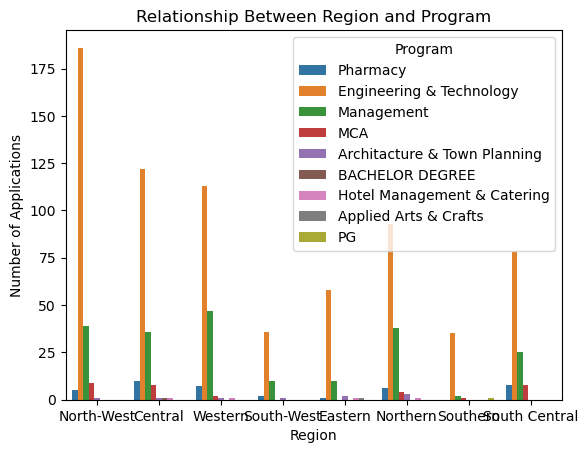

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='Region', hue='Program', data=df)
plt.xlabel('region')
plt.ylabel('applications')
plt.legend(title='Program')
plt.show()


In [ ]:
#question 4
state_counts = collection.aggregate(df)

state_counts = list(state_counts)
for state in state_counts:
    print(f"State: {state['_id']}, Applications: {state['count']}")


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import recall_score, f1_score


label_encoder = LabelEncoder()
df['CITY'] = label_encoder.fit_transform(df['CITY'])
df['Region'] = label_encoder.fit_transform(df['Region'])
df['Program'] = label_encoder.fit_transform(df['Program'])
df['approval_status'] = label_encoder.fit_transform(df['approval_status'])


X = df.drop('approval_status', axis=1)
y = df['approval_status']


KeyError: 'approval_status'